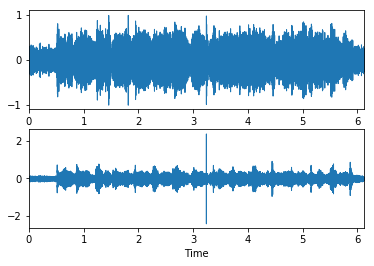

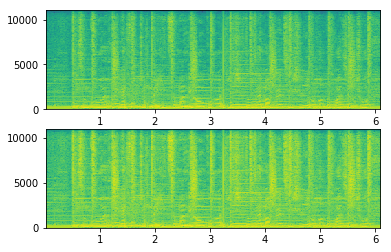

In [17]:
import numpy as np
import librosa as la
import librosa.display as dy
import scipy.signal as sl
import matplotlib.pyplot as plt

# 测试预加重效果以及预加重使用的滤波器(signal.lfilter)

aa, sr = la.load("wavs/GUI.wav", sr=None)  # 单声道读取
bb = sl.lfilter([1, -1.5], [1], aa)  # 设定系数b=[1, 0.97], a=[1]时, 是进行高通滤波, 实现预加重
# b[1]绝对值越大, 预加重效果越明显, 令b[1]=-1.2时, 高频比低频能量还大

# 滤波和没有滤波的波形图
fig, axs = plt.subplots(2, 1)
dy.waveplot(aa, sr, ax=axs[0])
dy.waveplot(bb, sr, ax=axs[1])
plt.show()

# signal.lfilter(b, a, x)的计算公式如下:
# M和N是b和a的长度
# a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[M]*x[n-M]
#                       - a[1]*y[n-1] - ... - a[N]*y[n-N]
#                    -1              -M

# lfilter实现的是一个fir滤波器(有限冲击响应滤波器), b是分子, a是分母
#        b[0] + b[1]z  + ... + b[M] z
#Y(z) = -------------------------------- X(z)
#                    -1              -N
#        a[0] + a[1]z  + ... + a[N] z

sl.lfilter([1,-0.9],[1],[1,2,3,4,5])  # array([1. , 1.1, 1.2, 1.3, 1.4])


fig, axs = plt.subplots(2, 1)
axs[0].specgram(aa, NFFT=1100, pad_to=2048, Fs=sr, noverlap=1100-275, mode='default', scale_by_freq=True,xextent=None)  
axs[1].specgram(bb, NFFT=1100, pad_to=2048, Fs=sr, noverlap=1100-275, mode='default', scale_by_freq=True,xextent=None)  
plt.show()


44100


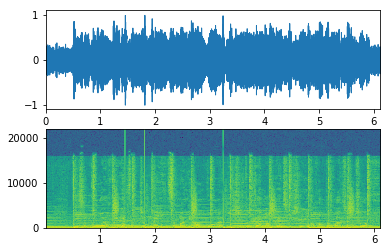

In [11]:
import numpy as np
import librosa as la
import librosa.display as dy
import scipy.signal as sl
import matplotlib.pyplot as plt

# 画图
fig, axs = plt.subplots(2, 1)
wav, sr = la.load("wavs/GG.wav", sr=None)  # 单声道读取
print(sr)
dy.waveplot(wav, sr=sr, ax=axs[0])
axs[1].specgram(wav, NFFT=1100, pad_to=2048, Fs=sr, noverlap=1100-275, mode='default', scale_by_freq=True,xextent=None)  
plt.show()


(269903,) (269903,)
44100 88200
(1025, 982) (1025, 982) (1025, 982) (1025, 982)
(982,)


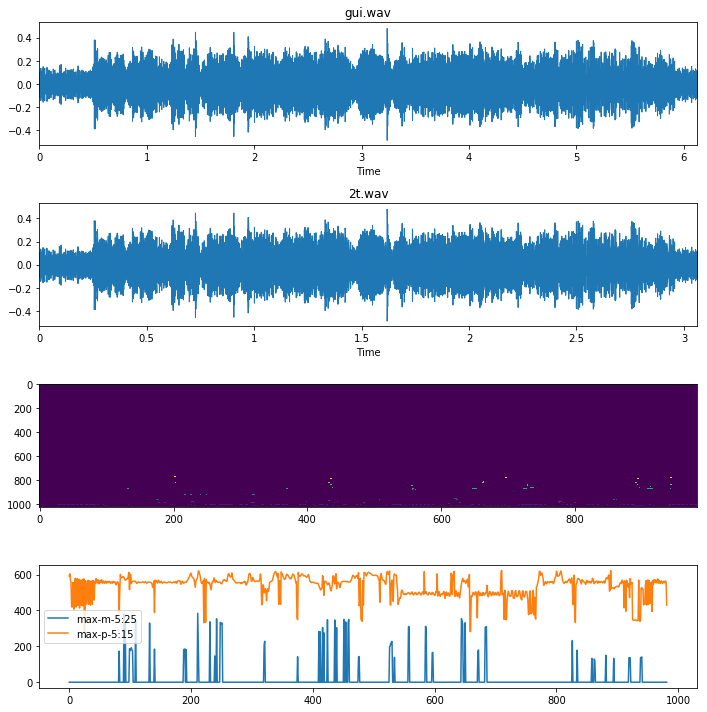

In [128]:
import numpy as np
import librosa as la
import librosa.display as dy
import scipy.signal as sl
import scipy.io.wavfile as we                                   
import matplotlib.pyplot as plt


wav1, sr1 = la.load("wavs/gui1.wav", sr=None)
we.write("wavs/2t.wav", int(22050*4), (wav1*2**15).astype(np.int16))
wav2, sr2 = la.load("wavs/2t.wav", sr=None)
print(wav1.shape, wav2.shape)
print(sr1, sr2)


p1, m1 = la.piptrack(wav1, sr=sr1, n_fft=2048, hop_length=275, fmax=5500, fmin=55)
p2, m2 = la.piptrack(wav2, sr=sr2, n_fft=2048, hop_length=275, fmax=5500, fmin=55)
print(p1.shape, p2.shape, m1.shape, m2.shape)
, 
fig, axs = plt.subplots(4, 1, figsize=(10, 10))
dy.waveplot(wav1, sr=sr1, ax=axs[0])
axs[0].set_title("gui.wav")
dy.waveplot(wav2, sr=sr2, ax=axs[1])
axs[1].set_title("2t.wav")
axs[2].imshow(np.rot90(p1.T), aspect='auto', interpolation="none")

idx = np.argmax(m2[5:15], 0)
print(idx.shape)
x2 = [p2[x,i] for i, x in enumerate(idx)]
axs[3].plot(x2, label="max-m-5:25")
axs[3].plot(np.max(p2[5:15, :], axis=0), label="max-p-5:15")  # 采样率为44100时, 频率分辨率大概为20
plt.legend()
fig.tight_layout()
plt.show()


(134952,) 22050
172.265625 (14,) [  9  23  39  54  70  85 100 116 131 146 162 178 193 208]
(108701,) [ 0.          0.          0.         ... -0.00074144 -0.00052856
 -0.00027452]
(108701,) [ 0.          0.          0.         ... -0.00074144 -0.00052856
 -0.00027452]


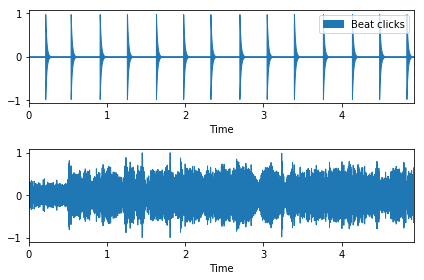

In [61]:
# Beat tracking example
#from __future__ import print_function
import librosa
import matplotlib.pyplot as plt
import librosa.display
 
# 1. Get the file path to the included audio example
# Sonify detected beat events
y, sr = librosa.load("wavs/GUI.wav")
print(y.shape, sr)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
print(tempo, beats.shape, beats)
y_beats = librosa.clicks(frames=beats, sr=sr)
print(y_beats.shape, y_beats)
 
# Or generate a signal of the same length as y
y_beats = librosa.clicks(frames=beats, sr=sr, length=len(y))
 
# Or use timing instead of frame indices
times = librosa.frames_to_time(beats, sr=sr)
y_beat_times = librosa.clicks(times=times, sr=sr)
print(y_beat_times.shape, y_beat_times)

# Or with a click frequency of 880Hz and a 500ms sample
y_beat_times880 = librosa.clicks(times=times, sr=sr,
                                 click_freq=880, click_duration=0.5)
 
# Display click waveform next to the spectrogram
plt.figure()
S = librosa.feature.melspectrogram(y=y, sr=sr)
ax = plt.subplot(2,1,2)
librosa.display.waveplot(y, sr=sr, label="wave form")
# librosa.display.specshow(librosa.power_to_db(S, ref=np.max),x_axis='time', y_axis='mel')
plt.subplot(2,1,1, sharex=ax)
librosa.display.waveplot(y_beat_times, sr=sr, label='Beat clicks')
plt.legend()
#plt.xlim(15, 30)
plt.tight_layout()
plt.show()